In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

%matplotlib inline

In [2]:
dataset_file = '../datasets/Smarket.csv'
data = pd.read_csv(dataset_file, index_col=0)
data.Direction = data.Direction.apply(lambda x: 1 if x == 'Up' else 0)
data.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
1,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,1
2,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,1
3,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,0
4,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,1
5,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,1


In [3]:
data.loc[data.isna().any(axis=1)]

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction


In [4]:
data.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000,1250.000000
mean,2003.016000,0.003834,0.003919,0.001716,0.001636,0.00561,1.478305,0.003138,0.518400
std,1.409018,1.136299,1.136280,1.138703,1.138774,1.14755,0.360357,1.136334,0.499861
min,2001.000000,-4.922000,-4.922000,-4.922000,-4.922000,-4.92200,0.356070,-4.922000,0.000000
25%,2002.000000,-0.639500,-0.639500,-0.640000,-0.640000,-0.64000,1.257400,-0.639500,0.000000
50%,2003.000000,0.039000,0.039000,0.038500,0.038500,0.03850,1.422950,0.038500,1.000000
75%,2004.000000,0.596750,0.596750,0.596750,0.596750,0.59700,1.641675,0.596750,1.000000
max,2005.000000,5.733000,5.733000,5.733000,5.733000,5.73300,3.152470,5.733000,1.000000


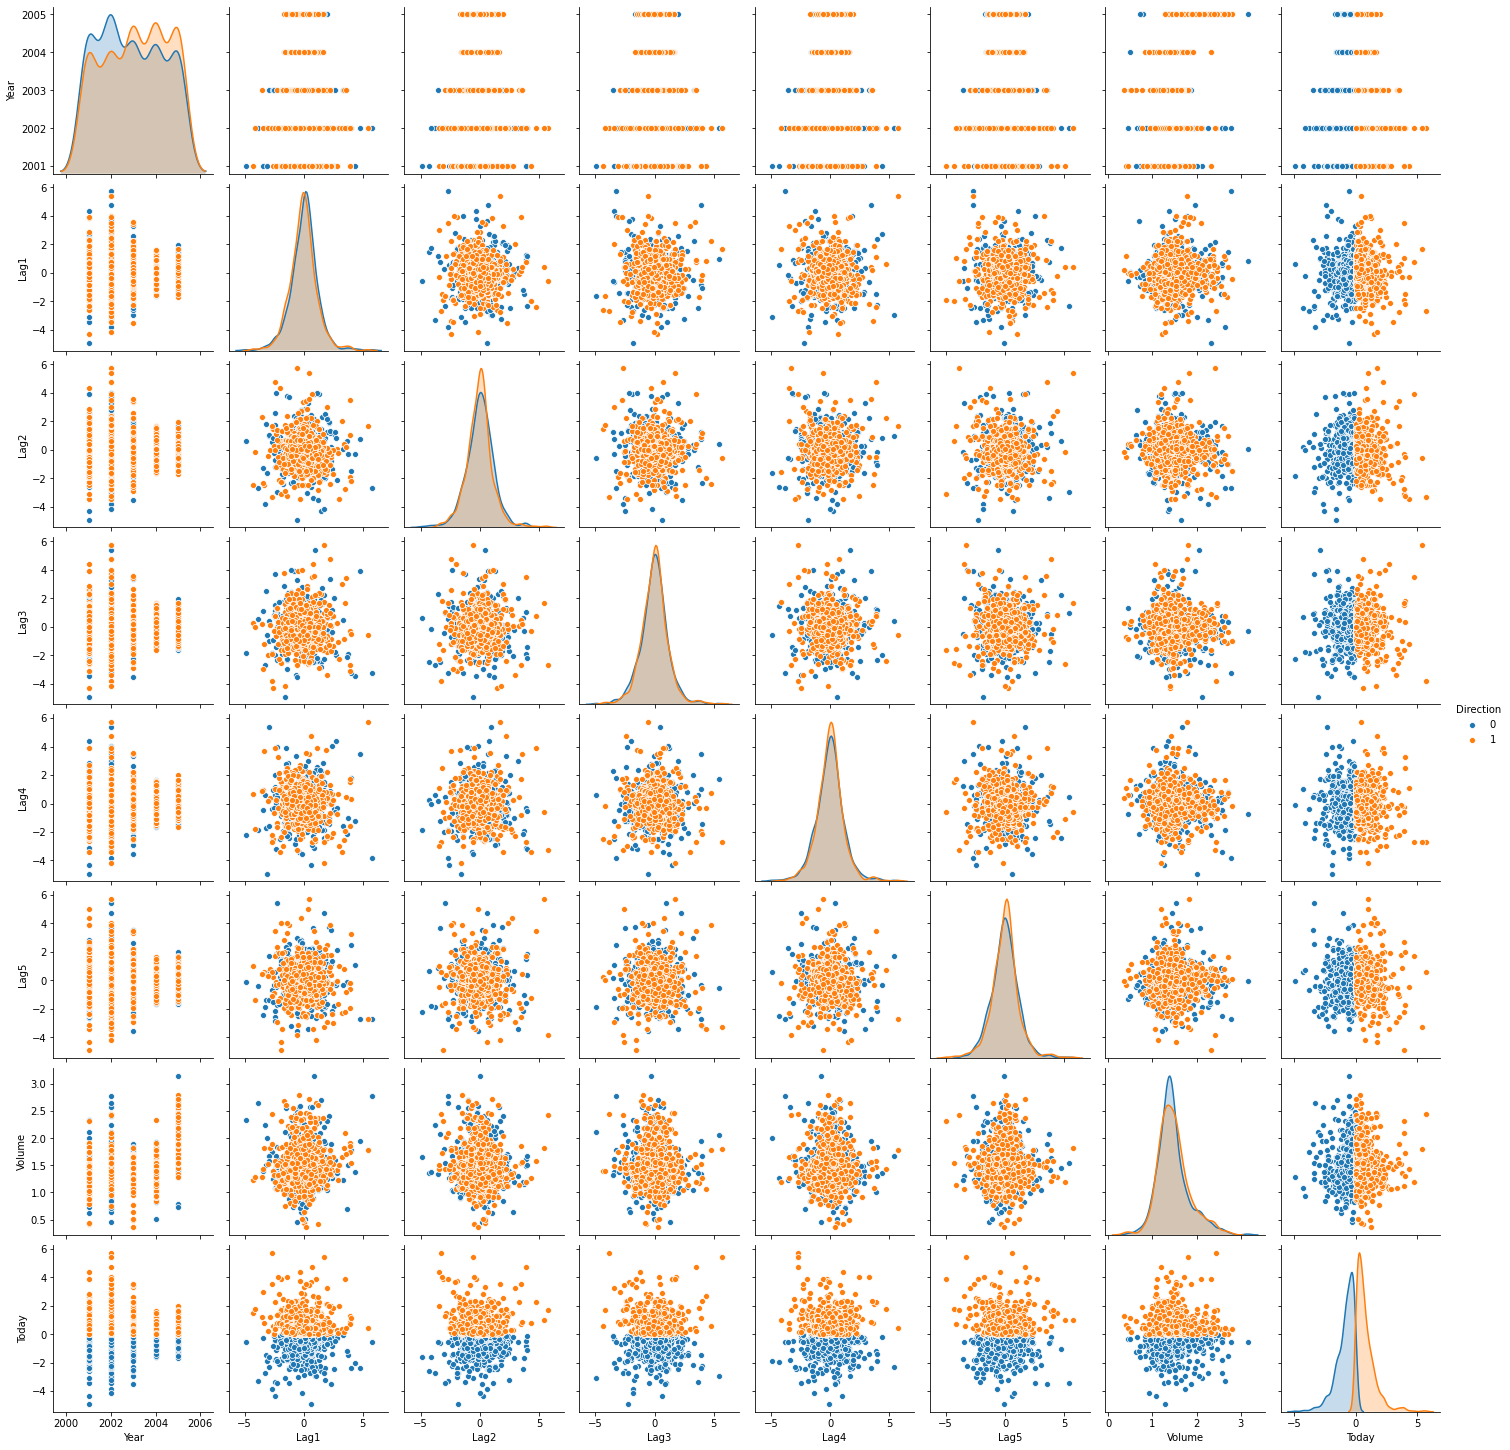

In [5]:
sns.pairplot(data, hue='Direction')

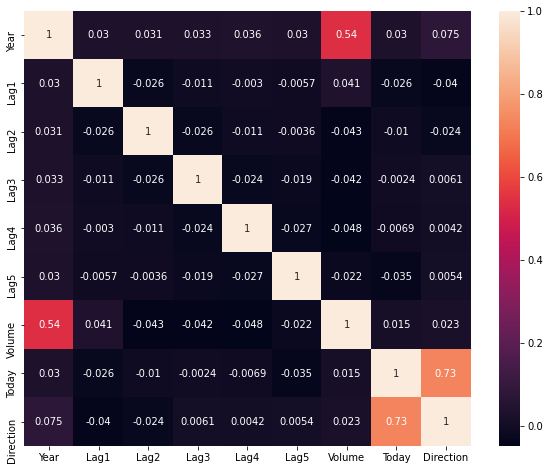

In [6]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True)

In [29]:
model = sm.Logit(data.Direction, sm.add_constant(data.drop(['Direction', 'Today'], axis=1))).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.688186
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                 1250
Model:                          Logit   Df Residuals:                     1242
Method:                           MLE   Df Model:                            7
Date:                Fri, 04 Sep 2020   Pseudo R-squ.:                0.006187
Time:                        17:02:16   Log-Likelihood:                -860.23
converged:                       True   LL-Null:                       -865.59
Covariance Type:            nonrobust   LLR p-value:                    0.1518
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -258.1635     96.995     -2.662      0.008    -448.269     -68.058
Year           0.1290      0.049      2.660      0.008       0.034       0.224
Lag1          -0.0749      0.050     -1.490      0.136      -0.173       0.024
Lag2          -0.0515      0.050     -1.024      0.306      -0.150       0.047
Lag3           0.0016      0.050      0.032      0.974      -0.097       0.100
Lag4          -0.0011      0.050     -0.022      0.982      -0.100       0.097
Lag5           0.0033      0.050      0.066      0.947      -0.094       0.101
Volume        -0.1413      0.190     -0.745      0.456      -0.513       0.230
==============================================================================
"""

In [20]:
model.predict()[:10]

array([0.46246486, 0.4372493 , 0.42294048, 0.45930423, 0.46028593,
       0.44669161, 0.42772204, 0.44529923, 0.47040901, 0.43746714])

In [21]:
col_mx = model.pred_table().T
col_mx

array([[221., 190.],
       [381., 458.]])

In [22]:
(col_mx[0, 0] + col_mx[1, 1]) / col_mx.sum()

0.5432

In [12]:
tpr = col_mx[1, 1] / (col_mx[0, 1] + col_mx[1, 1])
fpr = col_mx[1, 0] / (col_mx[0, 0] + col_mx[1, 0])
tpr, fpr

(0.7824074074074074, 0.760797342192691)

In [18]:
data_train = data.loc[data.Year < 2005]
data_test = data.loc[data.Year == 2005]

In [25]:
from sklearn.linear_model import LogisticRegression

In [30]:
model_sk = LogisticRegression().fit(data.drop(['Direction', 'Today'], axis=1), data.Direction)
model_sk.coef_

array([[ 2.73740950e-05, -7.28893224e-02, -4.41499799e-02,
         1.12629711e-02,  7.74278340e-03,  1.00377824e-02,
         1.32110662e-02]])